# Machine Learning
sebuah cara untuk membuat program (model) yang bisa digunakan untuk prediksi atau hal lainnya.

1. Supervised - Machine Learning membuat prediksi
2. Unsupervised - Machined Learning untuk merapikan data

Reinforced Learning, Deep Learning, adalah bagian dari Machine Learning. Mereka tipe algoritma berbeda.

### proses Machine Learning
1. kumpulkan data
2. rapikan data
3. latih model (pilih algoritma)
4. test model (apakah akurat? apakah overfit?)
5. tuning (balik ke step 1-4 untuk mencoba membuat model lebih baik)

## Supervised
anggap aja kita punya data luas tanah dan harga jual rumah. kita bisa masukkan data ini ke sebuah model machine learning, kita pilih juga algoritma (instruksi langkah demi langkah) yang akan digunakan python untuk melatih model.

model yang sudah dilatih nanti bisa menebak harga jual rumah dari luas tanah yang diberikan.. membuat prediksi.

## Unsupervised
tipe machine learning yang TIDAK membuat prediksi. contohnya model untuk memisahkan data jadi salah satu dari k kategori. contohnya model untuk mengurangi dimensi sebuah dataset.

## Supervised

### Linear Regression
saat data yang mau kita prediksi adalah tipe continuous. berjalan terus, sperti waktu, uang, berat, jarak, dll.

Tidak ada pemisah antar 1 unit dan unit lainnya, semua tergantung alat yang dipakai untuk mengukur data tersebut seberapa akurat. bayangkan ukur berat badan dengan timbangan jarum, atau timbangan elektrik. berat adalah salah satu variable bertipe continuous.

Untuk membuat prediksi berat (yang continuous) kita gunakan teknik Regression.

Teknik Regression bisa membentuk formula matematik untuk mencari hubungan antara fitur dengan target.

Contoh: harga rumah (target) dengan luas rumah (fitur). 

Linear = lurus

Linear Regression = membuat regression dengan garis lurus (formula matematika nya membuat sebuah garis lurus)

In [101]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(["ggplot"])

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split

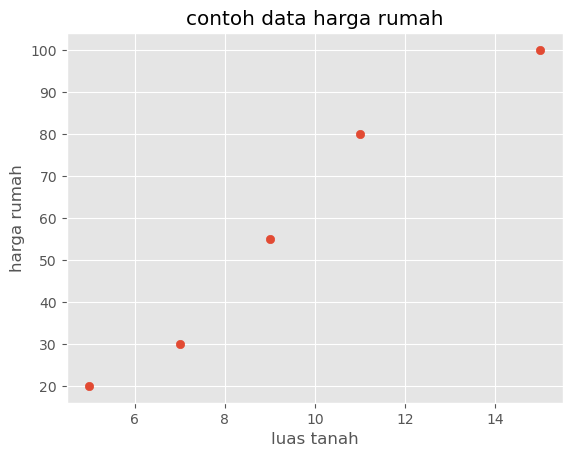

In [60]:
# 1. kumpulkan data
# kita buat data dummy

harga_rumah = [20, 30, 55, 80, 100]
luas_tanah = [5, 7, 9, 11, 15]

plt.scatter(x=luas_tanah, y=harga_rumah)
plt.title("contoh data harga rumah")
plt.xlabel("luas tanah")
plt.ylabel("harga rumah")
plt.show()

In [61]:
# harga_rumah = [20, 30, 55, 80, 100]
# luas_tanah = [5, 7, 9, 11, 15]

df_data = pd.DataFrame({"Harga":harga_rumah, "Luas":luas_tanah})
df_data

,Harga,Luas
0,20,5
1,30,7
2,55,9
3,80,11
4,100,15


2. data preparation

biasanya data perlu kita clean dulu,
- missing value,imputation
- invalid values,
- non-numerik values --> encode jadi numerik dan lainnya
- scaling

ada banyak hal yang perlu kita ubah dari raw data, untuk menjadi bentuk format yang siap dilatih ke machine learning.
- format judul kolom
- membuat kolom baru hasil agregasi kolom lain
- menghapus kolom/ fitur yang tidak diperlukan

ini termasuk juga menyisihkan sebagian data untuk jadi "test" data.


*untuk dummy data kita kali ini, simple dan bersih, kita bisa skip step 2 ini.

In [62]:
# pisahin data yang jadi "fitur" atau input
# dengan data yang jadi "target" atau yang akan ditebak

fitur = df_data[["Luas"]]
display(fitur)

target = df_data["Harga"]
display(target)

,Luas
0,5
1,7
2,9
3,11
4,15


0     20
1     30
2     55
3     80
4    100
Name: Harga, dtype: int64

3. latih model

pilih algoritma --> kita sudah pilih linear regression

latih data dengan algoritma untuk membuat model

In [63]:
# bikin model dengan memilih algoritma
model_rumah = LinearRegression()

# latih model dengan memasukkan data training
model_rumah.fit(fitur, target)

LinearRegression()

4. Evaluation

cek apakah model bisa memprediksi dengan baik.

Karena jumlah data dummy kita sedikit, kali ini kita skip dulu Evaluation dengan test data, kita Evaluation pakai training data juga. Ini tidak baik karena kita tidak tau apakah model overfit/ tidak.

In [64]:
# menggunakan model untuk membuat prediksi
# kita masukkan fitur yang mau dibuat prediksinya
# kita masukkan luas untuk dapat harga

hasil_prediksi_harga = model_rumah.predict(fitur)
hasil_prediksi_harga

array([ 19.39189189,  36.48648649,  53.58108108,  70.67567568,
       104.86486486])

In [65]:
pd.DataFrame(hasil_prediksi_harga)

,0
0,19.391892
1,36.486486
2,53.581081
3,70.675676
4,104.864865


In [66]:
model_rumah.score(fitur, target)

0.9653867036679536

correlation coefficient R2 kita gunakan untuk menentukan seberapa akurat hasil prediksi model yang kita buat dengan data test.  Barusan kita menggunakan data training untuk evaluasi, jadi angka ini perlu di note, harusnya tinggi, kita tidak tau apakah overfit atau tidak.

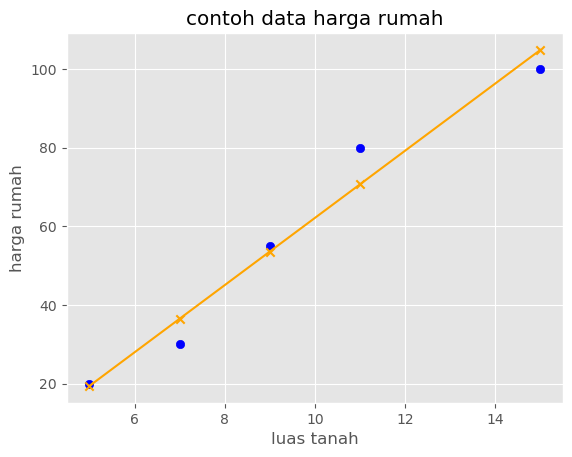

In [67]:
# optional - visualisasi
# bisa dilakukan jika cuma memiliki 1 fitur

plt.scatter(x=luas_tanah, y=harga_rumah, color="blue")

plt.scatter(x=luas_tanah, y=hasil_prediksi_harga, color="orange", marker="x")
plt.plot(luas_tanah, hasil_prediksi_harga, color="orange")

plt.title("contoh data harga rumah")
plt.xlabel("luas tanah")
plt.ylabel("harga rumah")
plt.show()

# Case Study: Linear Regression
kita gunakan data dari Kaggle tentang heart disease indicators untuk membuat model yang bisa memprediksi apakah seseorang punya sakit jantung/ tidak dari BMI mereka

In [68]:
# 1. import data
df_heart = pd.read_csv("../dataset/heart_2022_Key_indicators.csv")
df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [69]:
df_data = df_heart[["HeartDisease", "BMI"]]
df_data

,HeartDisease,BMI
0,No,16.60
1,No,20.34
2,No,26.58
3,No,24.21
4,No,23.71
...,...,...
319790,Yes,27.41
319791,No,29.84
319792,No,24.24
319793,No,32.81


2. data preparation

salah satu hal yang perlu di prep sebelum membuat model machine learning adalah:
- encoding

mengubah data non numerik menjadi numerik

In [70]:
le = LabelEncoder()

le.fit(df_data["HeartDisease"])

print(le.classes_)

['No' 'Yes']


semua "No" diubah menjadi 0, semua "Yes" diubah menjadi 1

In [71]:
df_data["Target"] = le.transform(df_data["HeartDisease"])

df_data.head()

C:\Users\stefa\AppData\Local\Temp\ipykernel_20060\3894331233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["Target"] = le.transform(df_data["HeartDisease"])


,HeartDisease,BMI,Target
0,No,16.60,0
1,No,20.34,0
2,No,26.58,0
3,No,24.21,0
4,No,23.71,0


In [72]:
fitur = df_data[["BMI"]]
fitur

,BMI
0,16.60
1,20.34
2,26.58
3,24.21
4,23.71
...,...
319790,27.41
319791,29.84
319792,24.24
319793,32.81


In [73]:
target = df_data["Target"]
target

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: Target, Length: 319795, dtype: int32

3. latih model

In [74]:
# step tambahan, pisahin data jadi training dan testing data

X_train, X_test, y_train, y_test = train_test_split(
    fitur, target, test_size=0.30, random_state=42)

In [75]:
model_heart = LinearRegression()

model_heart.fit(X_train, y_train)

LinearRegression()

4. evaluasi akurasi model

In [76]:
model_heart.score(X_test, y_test)

0.0022914172506577346

In [77]:
df_data.head()

,HeartDisease,BMI,Target
0,No,16.60,0
1,No,20.34,0
2,No,26.58,0
3,No,24.21,0
4,No,23.71,0


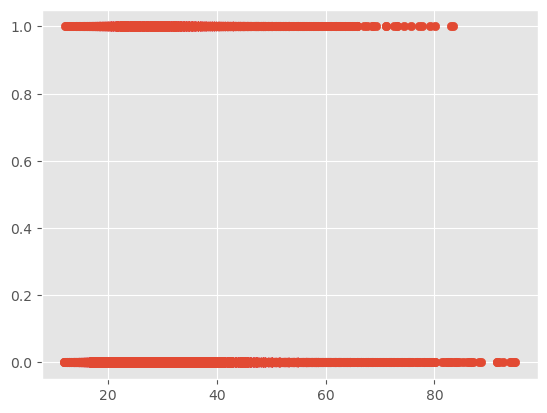

In [78]:
plt.scatter(data=df_data, x="BMI", y="Target")

sebenarnya untuk data tipe label (cuma 0 dan 1, atau 10 label berbeda, discrete) TIDAK cocok untuk tipe regression.

kita boleh tes sekali lagi pakai target yang continuous bukan categorical. misalkan BMI untuk menebak score physical health.

In [82]:
# 1. siapin data
# display(df_heart.head())

# 2. rapiin data
df_data = df_heart[["PhysicalHealth", "BMI"]]
df_data.head()

# siapin fitur dan target
X = df_data[["BMI"]]
y = df_data["PhysicalHealth"]

# split data jadi training dan testing dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# 3. buat dan latih model
# dengan data training
model_health = LinearRegression()
model_heart.fit(X_train, y_train)

# 4. evaluasi model
# dengan data testing
model_heart.score(X_test, y_test)

0.01238209652976563

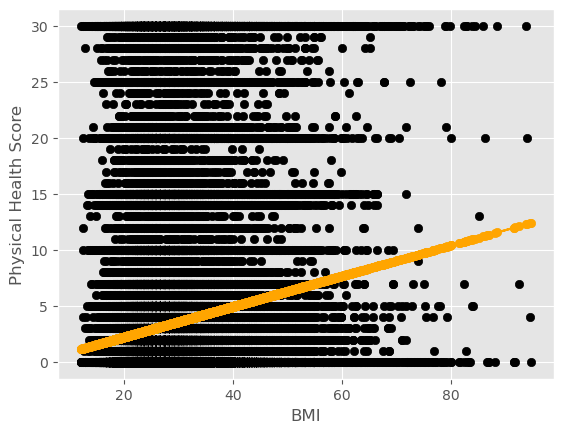

In [86]:
plt.scatter(X, y, color="black")

y_pred = model_heart.predict(X)
plt.scatter(X, y_pred, color="orange")
plt.plot(X, y_pred, color="orange")

plt.xlabel("BMI")
plt.ylabel("Physical Health Score")

plt.show()

# Multiple Linear Regression
membuat model Linear Regression yang punya lebih dari 1 fitur

In [90]:
# bagaimana kalau kita gunakan BMI dan Sleep time untuk memprediksi Physical Health
df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [91]:
fitur = df_heart[["BMI", "SleepTime"]]
fitur.head()

,BMI,SleepTime
0,16.60,5.0
1,20.34,7.0
2,26.58,8.0
3,24.21,6.0
4,23.71,8.0


In [92]:
target = df_heart["PhysicalHealth"]
target

0          3.0
1          0.0
2         20.0
3          0.0
4         28.0
          ... 
319790     7.0
319791     0.0
319792     0.0
319793     0.0
319794     0.0
Name: PhysicalHealth, Length: 319795, dtype: float64

1. siapkan data --> df_heart
2. rapikan data --> siapin kolom fitur dan target
* split data jadi training dan testing data
3. buat dan latih model

In [93]:

X_train, X_test, y_train, y_test = train_test_split(
    fitur, target, test_size=0.30, random_state=42)

In [94]:
model_health2 = LinearRegression()

model_health2.fit(X_train, y_train)

LinearRegression()

In [95]:
# 4. evaluasi

model_health2.score(X_test, y_test)

0.015152312968711446

data ini memiliki hasil skor prediksi yang sangat rendah, mungkin memang datanya tidak cocok.

Kita bisa coba dengan algoritma lain, misalkan Polynomial Regression.

# Polynomial Regression
coba polynomial regression

secara konsep seperti Linear Regression tapi kita menggunakan x yang bisa ber kuadrat, ber kubik, tidak harus x polos. kita bisa ubah degree dari x.


Linear Regression 1 fitur: y = ax + b ---> y = 2x + 3

Linear Regression 2 fitur: y = ax1 + bx2 + c ---> y = 2x1 + 3x2 + 5 --- dimana x1 bisa jadi adalah luas tanah, x2 adalah luas bangunan, y adalah harga rumah

In [117]:
# siapin data
df_heart.head()

# rapiin data, pilih fitur dan target
fitur = df_heart[["BMI", "SleepTime"]]
display(fitur.head())

target = df_heart["PhysicalHealth"]
target

# ubah data jadi versi Polynomial untuk nanti bergabung dengan LinearRegression jadi Polynomial Regression
# kita bisa pilih Polynomial mau kuadrat, kubik, pangkat 4, atau seterusnya

d = 5
transformer = PolynomialFeatures(d, include_bias=False)
transformer.fit(fitur)

# transformer ready, kita ubah fitur menjadi versi polynomial
fitur_poly = pd.DataFrame(transformer.transform(fitur))
fitur_poly

,BMI,SleepTime
0,16.60,5.0
1,20.34,7.0
2,26.58,8.0
3,24.21,6.0
4,23.71,8.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,16.60,5.0,275.5600,83.00,25.0,4574.296000,1377.8000,415.00,125.0,7.593331e+04,22871.480000,6889.0000,2075.00,625.0,1.260493e+06,3.796666e+05,1.143574e+05,3.444500e+04,10375.00,3125.0
1,20.34,7.0,413.7156,142.38,49.0,8414.975304,2896.0092,996.66,343.0,1.711606e+05,58904.827128,20272.0644,6976.62,2401.0,3.481407e+06,1.198124e+06,4.123338e+05,1.419045e+05,48836.34,16807.0
2,26.58,8.0,706.4964,212.64,64.0,18778.674312,5651.9712,1701.12,512.0,4.991372e+05,150229.394496,45215.7696,13608.96,4096.0,1.326707e+07,3.993097e+06,1.201835e+06,3.617262e+05,108871.68,32768.0
3,24.21,6.0,586.1241,145.26,36.0,14190.064461,3516.7446,871.56,216.0,3.435415e+05,85140.386766,21100.4676,5229.36,1296.0,8.317139e+06,2.061249e+06,5.108423e+05,1.266028e+05,31376.16,7776.0
4,23.71,8.0,562.1641,189.68,64.0,13328.910811,4497.3128,1517.44,512.0,3.160285e+05,106631.286488,35978.5024,12139.52,4096.0,7.493035e+06,2.528228e+06,8.530503e+05,2.878280e+05,97116.16,32768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,6.0,751.3081,164.46,36.0,20593.355021,4507.8486,986.76,216.0,5.644639e+05,123560.130126,27047.0916,5920.56,1296.0,1.547195e+07,3.386783e+06,7.413608e+05,1.622825e+05,35523.36,7776.0
319791,29.84,5.0,890.4256,149.20,25.0,26570.299904,4452.1280,746.00,125.0,7.928577e+05,132851.499520,22260.6400,3730.00,625.0,2.365888e+07,3.964289e+06,6.642575e+05,1.113032e+05,18650.00,3125.0
319792,24.24,6.0,587.5776,145.44,36.0,14242.881024,3525.4656,872.64,216.0,3.452474e+05,85457.286144,21152.7936,5235.84,1296.0,8.368798e+06,2.071485e+06,5.127437e+05,1.269168e+05,31415.04,7776.0
319793,32.81,12.0,1076.4961,393.72,144.0,35319.837041,12917.9532,4724.64,1728.0,1.158844e+06,423838.044492,155015.4384,56695.68,20736.0,3.802167e+07,1.390613e+07,5.086057e+06,1.860185e+06,680348.16,248832.0


In [118]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    fitur_poly, target, test_size=0.30, random_state=42)

# buat dan latih model
model_health_poly = LinearRegression()
model_health_poly.fit(X_train, y_train)

LinearRegression()

In [119]:
# evaluasi
model_health_poly.score(X_test, y_test)

0.05442765745049427

contoh tuning yang bisa dilakukan, untuk Polynomial Regression kita bisa coba ubah degree polynomial nya

## latihan

gunakan dataset dari sklearn, boston housing dataset

buatlah model tipe linear regression dan tipe polynomial regression

pilih fitur yang ingin digunakan, untuk memprediksi target harga rumah 


--- coba sampai jam 21.15 ---

In [127]:
from sklearn import datasets

data = datasets.load_boston()
# data

df_fitur = pd.DataFrame(data.data, columns=data.feature_names)
# df_fitur

target = pd.DataFrame(data.target, columns=["MEDV"])
# target

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [139]:
df_fitur.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [138]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [150]:
# Linear Regression
# df_fitur, target

# cobain fitur tanpa TAX

# split data
X_train, X_test, y_train, y_test = train_test_split(
    df_fitur, target, test_size=0.25, random_state=42)

# buat dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluasi model
model.score(X_test, y_test)

0.6844267283527059

In [152]:
# Polynomial Regression

# polynomial features
transformer = PolynomialFeatures(degree=2, include_bias=False)

df_fitur_poly = transformer.fit_transform(df_fitur)
df_fitur_poly = pd.DataFrame(df_fitur_poly)
df_fitur_poly.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


In [153]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    df_fitur_poly, target, test_size=0.30, random_state=42)

In [154]:
# buat dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [155]:
X_train.head(1) # 1 input

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
5,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,...,49284.0,4151.4,87494.64,1156.62,349.69,7370.044,97.427,155330.5744,2053.3652,27.1441


In [160]:
# evaluasi
model.score(X_test, y_test)

0.6610321969508431

model yang sudah dilatih, bisa dipakai untuk buat prediksi.

contohnya, untuk model Linear Regression diatas, menerima input berupa:
CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT

model bisa memberikan prediksi MEDV apa, kalau kita berikan semua info diatas.

untuk model Polynomial Regression, kita perlu transform juga data input kita menjadi versi Polynomial sebelum kita berikan ke modelnya.

In [159]:
contoh_data = [[0.08, 0, 3, 0, 0.5, 7, 120, 2.9, 2.5, 200, 18.3, 350.75, 7.3]]

contoh_data_poly = transformer.transform(contoh_data)

model.predict(contoh_data_poly)

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[24.6611801]])

jadi kita telah membuat prediksi kalau harga rumah dengan fitur contoh_data memiliki harga 24.66 ribu USD

# Case Study: Car Price Assignment

kita gunakan [data car](https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv) untuk memprediksi harga mobil dari detail mobil tersebut

In [161]:
df_car = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv")
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [163]:
df_car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [164]:
# set fitur dan target
X = df_car[['wheelbase', 'horsepower']]
y = df_car['price']

In [165]:
# buat dan latih model
model_car = LinearRegression()
model_car.fit(X, y)

# evaluasi
model_car.score(X, y)

0.7507159230862108

In [166]:
# kita mau pakai model
# model_car bisa buat prediksi harga mobil kalau kita berikan informasi wheelbase dan horsepower
# misalkan mobil kita punya wheelbase 99.8, dan horsepower 154, kira kira berapa harga mobilnya?
model_car.predict([[99.8, 154]])

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20693.95638395])

model_car memprediksi kalau mobil yang punya wheelbase 99.8, dan horsepower 154, akan memiliki price 20694

# Persiapan dataset
1. load data, pandas DataFrame biasanya enak dilihat
2. pengertian data: kolom mana yang mau dipakai, baris mana yang mau dipakai
    - drop kolom dan baris yang tidak diperlukan
    - misalkan kolom yang tidak berguna, atau baris yang banyak missing value
3. ganti judul kolom jadi mudah dimengerti
4. explore data: data ini tentang apa? ada yang gk masuk akal? ada trend tertentu?
5. missing value: kalau ada data yang nan, missing, 0, perlu diapakan? dihapus, diisi, dibiarkan?
6. invalid value: kalau ketemu data yang tidak masuk akal, dihapus
7. tambahan kolom - apakah ada data hasil hitung2an, atau agregasi yang akan membantu
8. tipe data tanggal: diubah jadi datatype datetime

... masih banyak lagi teknik persiapan data lainnya, tapi tidak harus dipakai semua, yang standar dulu saja.